# An Introduction to Scientific Python – Pandas

http://www.datadependence.com/2016/05/scientific-python-pandas/


이 예제는 Anaconda 설치 후 아래 명령으로 환경을 생성한 다음 jupyter-notebook으로 실행해주세요.

$ conda create -n dsci2 pandas matplotlib scikit-learn jupyter

## IMPORTING PANDAS

In [1]:
import pandas as pd

## Getting Data Into Pandas
### Data from DATA.GOV.UK
#### Average temperature and total rainfall in England and Wales
https://data.gov.uk/dataset/average-temperature-and-rainfall-england-and-wales

Outfall and rainfall for UK 1980 to 2013

http://data.defra.gov.uk/statistics_2015/env/water/uk_rain_2014.csv

참고: cURL 사용법: http://ohgyun.com/397


In [6]:
# 다운 받으려면 아래 주석 제거하고 실행
!curl -o ~/Downloads/uk_rain_2014.csv http://data.defra.gov.uk/statistics_2015/env/water/uk_rain_2014.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1361  100  1361    0     0   1534      0 --:--:-- --:--:-- --:--:--  1641


In [7]:
df = pd.read_csv('~/Downloads/uk_rain_2014.csv', header=0)

## GETTING YOUR DATA READY TO EXPLORE AND ANALYSE

In [8]:
df.head(5)

,﻿Water Year,Rain (mm) Oct-Sep,Outflow (m3/s) Oct-Sep,Rain (mm) Dec-Feb,Outflow (m3/s) Dec-Feb,Rain (mm) Jun-Aug,Outflow (m3/s) Jun-Aug
0,1980/81,1182,5408,292,7248,174,2212
1,1981/82,1098,5112,257,7316,242,1936
2,1982/83,1156,5701,330,8567,124,1802
3,1983/84,993,4265,391,8905,141,1078
4,1984/85,1182,5364,217,5813,343,4313


In [9]:
df.tail(5)

,﻿Water Year,Rain (mm) Oct-Sep,Outflow (m3/s) Oct-Sep,Rain (mm) Dec-Feb,Outflow (m3/s) Dec-Feb,Rain (mm) Jun-Aug,Outflow (m3/s) Jun-Aug
28,2008/09,1139,4941,268,6690,323,3189
29,2009/10,1103,4738,255,6435,244,1958
30,2010/11,1053,4521,265,6593,267,2885
31,2011/12,1285,5500,339,7630,379,5261
32,2012/13,1090,5329,350,9615,187,1797


In [10]:
df.columns

Index([u'﻿Water Year', u'Rain (mm) Oct-Sep', u'Outflow (m3/s) Oct-Sep',
       u'Rain (mm) Dec-Feb', u'Outflow (m3/s) Dec-Feb', u'Rain (mm) Jun-Aug',
       u'Outflow (m3/s) Jun-Aug'],
      dtype='object')

In [11]:
df.columns = ['water_year','rain_octsep', 'outflow_octsep',
              'rain_decfeb', 'outflow_decfeb', 'rain_junaug', 'outflow_junaug']
 
df.head(5)

,water_year,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug
0,1980/81,1182,5408,292,7248,174,2212
1,1981/82,1098,5112,257,7316,242,1936
2,1982/83,1156,5701,330,8567,124,1802
3,1983/84,993,4265,391,8905,141,1078
4,1984/85,1182,5364,217,5813,343,4313


In [12]:
len(df)

33

In [13]:
pd.options.display.float_format = '{:,.3f}'.format # Limit output to 3 decimal places.
df.describe()

,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug
count,33.000,33.000,33.000,33.000,33.000,33.000
mean,"1,129.000","5,019.182",325.364,"7,926.545",237.485,"2,439.758"
std,101.900,658.588,69.995,"1,692.800",66.168,"1,025.914"
min,856.000,"3,479.000",206.000,"4,578.000",103.000,"1,078.000"
25%,"1,053.000","4,506.000",268.000,"6,690.000",193.000,"1,797.000"
50%,"1,139.000","5,112.000",309.000,"7,630.000",229.000,"2,142.000"
75%,"1,182.000","5,497.000",360.000,"8,905.000",280.000,"2,959.000"
max,"1,387.000","6,391.000",484.000,"11,486.000",379.000,"5,261.000"


## FILTERING

In [14]:
df['rain_octsep'].tail(5)

28    1139
29    1103
30    1053
31    1285
32    1090
Name: rain_octsep, dtype: int64

In [15]:
df.rain_octsep.tail(5)

28    1139
29    1103
30    1053
31    1285
32    1090
Name: rain_octsep, dtype: int64

In [16]:
df.rain_octsep < 1000

0     False
1     False
2     False
3      True
4     False
5     False
6     False
7     False
8      True
9     False
10    False
11    False
12    False
13    False
14    False
15     True
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
Name: rain_octsep, dtype: bool

In [17]:
df[df.rain_octsep < 1000]

,water_year,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug
3,1983/84,993,4265,391,8905,141,1078
8,1988/89,976,4330,309,6465,200,1440
15,1995/96,856,3479,245,5515,172,1439


In [18]:
df[(df.rain_octsep < 1000) & (df.outflow_octsep < 4000)]

,water_year,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug
15,1995/96,856,3479,245,5515,172,1439


In [19]:
df[df.water_year.str.startswith('199')]

,water_year,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug
10,1990/91,1022,4418,305,7120,216,1923
11,1991/92,1151,4506,246,5493,280,2118
12,1992/93,1130,5246,308,8751,219,2551
13,1993/94,1162,5583,422,10109,193,1638
14,1994/95,1110,5370,484,11486,103,1231
15,1995/96,856,3479,245,5515,172,1439
16,1996/97,1047,4019,258,5770,256,2102
17,1997/98,1169,4953,341,7747,285,3206
18,1998/99,1268,5824,360,8771,225,2240
19,1999/00,1204,5665,417,10021,197,2166


## INDEXING

In [20]:
df.iloc[30]

water_year        2010/11
rain_octsep          1053
outflow_octsep       4521
rain_decfeb           265
outflow_decfeb       6593
rain_junaug           267
outflow_junaug       2885
Name: 30, dtype: object

In [21]:
df = df.set_index(['water_year'])
df.head(5)

,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug
water_year,,,,,,
1980/81,1182,5408,292,7248,174,2212
1981/82,1098,5112,257,7316,242,1936
1982/83,1156,5701,330,8567,124,1802
1983/84,993,4265,391,8905,141,1078
1984/85,1182,5364,217,5813,343,4313


In [22]:
df.loc["2000/01"]

rain_octsep       1239
outflow_octsep    6092
rain_decfeb        328
outflow_decfeb    9347
rain_junaug        236
outflow_junaug    2142
Name: 2000/01, dtype: int64

In [23]:
df.ix['1999/00']

rain_octsep        1204
outflow_octsep     5665
rain_decfeb         417
outflow_decfeb    10021
rain_junaug         197
outflow_junaug     2166
Name: 1999/00, dtype: int64

In [24]:
df.sort_index(ascending=False).head(5)

,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug
water_year,,,,,,
2012/13,1090,5329,350,9615,187,1797
2011/12,1285,5500,339,7630,379,5261
2010/11,1053,4521,265,6593,267,2885
2009/10,1103,4738,255,6435,244,1958
2008/09,1139,4941,268,6690,323,3189


In [25]:
df = df.reset_index('water_year')
df.head(5)

,water_year,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug
0,1980/81,1182,5408,292,7248,174,2212
1,1981/82,1098,5112,257,7316,242,1936
2,1982/83,1156,5701,330,8567,124,1802
3,1983/84,993,4265,391,8905,141,1078
4,1984/85,1182,5364,217,5813,343,4313


## APPLYING FUNCTIONS TO DATASETS

In [26]:
def base_year(year):
    base_year = year[:4]
    base_year= pd.to_datetime(base_year).year
    return base_year

df['year'] = df.water_year.apply(base_year)
df.head(5)

,water_year,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug,year
0,1980/81,1182,5408,292,7248,174,2212,1980
1,1981/82,1098,5112,257,7316,242,1936,1981
2,1982/83,1156,5701,330,8567,124,1802,1982
3,1983/84,993,4265,391,8905,141,1078,1983
4,1984/85,1182,5364,217,5813,343,4313,1984


## MANIPULATING A DATASET’S STRUCTURE

In [27]:
df.groupby(df.year // 10 * 10).max()

,water_year,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug,year
year,,,,,,,,
1980,1989/90,1210,5701,470,10520,343,4313,1989
1990,1999/00,1268,5824,484,11486,285,3206,1999
2000,2009/10,1387,6391,437,10926,357,5168,2009
2010,2012/13,1285,5500,350,9615,379,5261,2012


In [28]:
decade_rain = df.groupby([df.year // 10 * 10, df.rain_octsep // 1000 * 1000])[['outflow_octsep',
                                                                              'outflow_decfeb',
                                                                              'outflow_junaug']].mean()
decade_rain

outflow_octsep  outflow_decfeb  outflow_junaug
year rain_octsep                                                
1980 0                 4,297.500       7,685.000       1,259.000
     1000              5,289.625       7,933.000       2,572.250
1990 0                 3,479.000       5,515.000       1,439.000
     1000              5,064.889       8,363.111       2,130.556
2000 1000              5,030.800       7,812.100       2,685.900
2010 1000              5,116.667       7,946.000       3,314.333

In [29]:
decade_rain.unstack(0)

outflow_octsep                               outflow_decfeb  \
year                  1980      1990      2000      2010           1980   
rain_octsep                                                               
0                4,297.500 3,479.000       nan       nan      7,685.000   
1000             5,289.625 5,064.889 5,030.800 5,116.667      7,933.000   

                                          outflow_junaug                      \
year             1990      2000      2010           1980      1990      2000   
rain_octsep                                                                    
0           5,515.000       nan       nan      1,259.000 1,439.000       nan   
1000        8,363.111 7,812.100 7,946.000      2,572.250 2,130.556 2,685.900   

                       
year             2010  
rain_octsep            
0                 nan  
1000        3,314.333

In [30]:
decade_rain.unstack(1)

outflow_octsep           outflow_decfeb           outflow_junaug  \
rain_octsep           0         1000           0         1000           0      
year                                                                           
1980             4,297.500 5,289.625      7,685.000 7,933.000      1,259.000   
1990             3,479.000 5,064.889      5,515.000 8,363.111      1,439.000   
2000                   nan 5,030.800            nan 7,812.100            nan   
2010                   nan 5,116.667            nan 7,946.000            nan   

                       
rain_octsep      1000  
year                   
1980        2,572.250  
1990        2,130.556  
2000        2,685.900  
2010        3,314.333

In [31]:
high_rain = df[df.rain_octsep > 1250]
high_rain

,water_year,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug,year
18,1998/99,1268,5824,360,8771,225,2240,1998
26,2006/07,1387,6391,437,10926,357,5168,2006
31,2011/12,1285,5500,339,7630,379,5261,2011


In [32]:
high_rain.pivot('year', 'rain_octsep')[['outflow_octsep', 'outflow_decfeb', 'outflow_junaug']].fillna('')

outflow_octsep                     outflow_decfeb            \
rain_octsep           1268      1285      1387           1268      1285   
year                                                                      
1998             5,824.000                          8,771.000             
2006                                 6,391.000                            
2011                       5,500.000                          7,630.000   

                       outflow_junaug                      
rain_octsep       1387           1268      1285      1387  
year                                                       
1998                        2,240.000                      
2006        10,926.000                          5,168.000  
2011                                  5,261.000

## COMBINING DATASETS

## USING PANDAS TO PLOT GRAPHS QUICKLY

/Users/KIKIM/anaconda3/envs/dsci2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


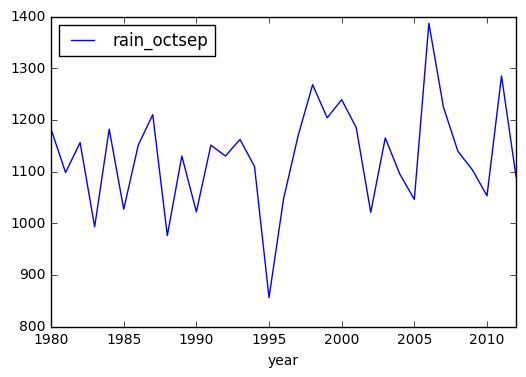

In [33]:
%matplotlib inline
df.plot(x='year', y=['rain_octsep'])